<a href="https://colab.research.google.com/github/SampMark/Machine-Learn/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modelos de Regressão Linear Simples e Múltipla**

A regressão linear múltipla é usada para prever uma variável dependente contínua a partir de múltiplas variáveis independentes. É uma extensão da regressão linear simples para múltiplas variáveis independentes.

Neste caso, além da variável ENGINESIZE, foram consideradas para efeito de análise o FUELCONSUMPTION_COMB e CYLINDERS, enquanto a variável dependente é CO2EMISSIONS.

Cada variável independente contribui para prever o valor da variável dependente com um peso específico, representado pelos coeficientes 𝜃1,𝜃2,…,𝜃𝑛, no modelo.

**Modelo Matemático**:

  $$ \hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_n x_n $$


**Representação na forma vetorial**:

  $$ \hat{y} = \theta^T X $$

  $\theta\$: Vetor de coeficientes.

  $X$: Vetor de recursos (variáveis independentes).
  Funcionamento:

Cada coeficiente (𝜃<sub>i</sub>) representa o impacto relativo da variável independente correspondente.
Todavia, a adição de múltiplas variáveis preditoras, embora possa melhorar a precisão do modelo, também pode distorcê-lo, pode introduzir a problemas como o da multicolinearidade (isto é, quando as variáveis preditoras estão altamente correlacionadas). Isto pode distorcer os coeficientes e produzir *overfiting* (sobreajuste ou "ajustamento excessivo"), o que pode reduzir a possibilidade de generalização e até a interpretabilidade do modelo.

## **Instalando bibliotecas Python**

---



In [9]:
!pip install scikit-learn
!pip install matplotlib
!pip install pandas
!pip install numpy
!pip install seaborn
%matplotlib inline

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## **Importação e Análise Exploratória dos Dados**

---



In [11]:
# importando e explorando os dados
df = pd.read_csv("https://raw.githubusercontent.com/SampMark/files/refs/heads/main/FuelConsumptionCo2.csv")
print("O conjunto de dados tem {} linhas e {} colunas".format(df.shape[0], df.shape[1]))
df.head()

O conjunto de dados tem 1067 linhas e 13 colunas


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [12]:
# Selecionando as variáveis independentes de interesse
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


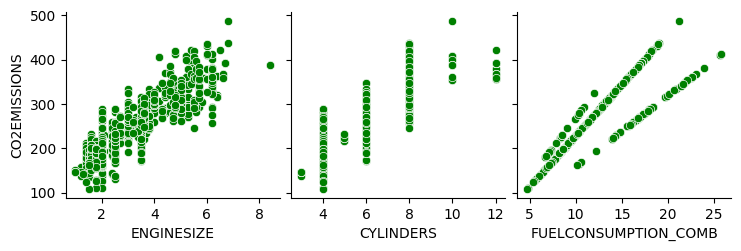

In [13]:
# Plotando gráficos de dispersão em pares para as variáveis selecionadas
sns.pairplot(df, x_vars=['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB'], y_vars='CO2EMISSIONS', kind='scatter', plot_kws={'color': 'green'})
plt.show()

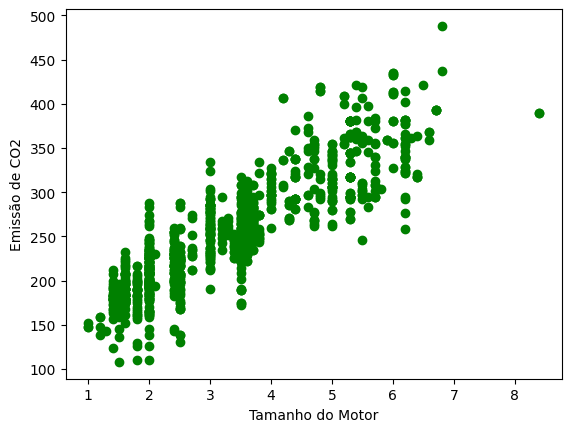

In [14]:
# Plotando gráfico de correlação entre as variável depedente, Emissão de CO2, em relação a variável idependente, Tamanho do Motor
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='green')
plt.xlabel("Tamanho do Motor")
plt.ylabel("Emissão de CO2")
plt.show()

# **Modelagem em Machine Learn**

---



In [15]:
# Separa os dados nos conjuntos de treinamento (0.8) e teste (0.2), utilizando a função np.random.rand() para mascarar, selecionar linhas aleatoriamente
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

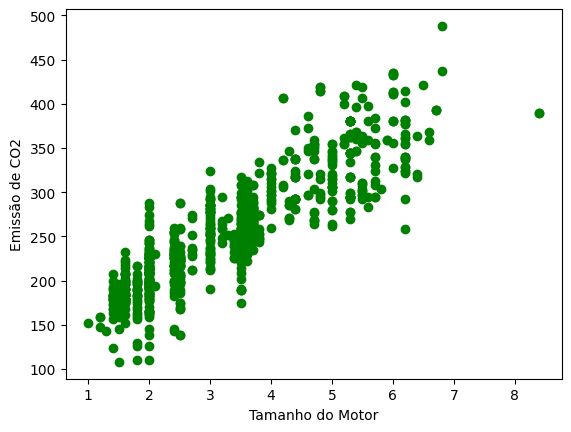

In [16]:
# Treina o modelo com base na distribuição dos dados
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='green')
plt.xlabel("Tamanho do Motor")
plt.ylabel("Emissão de CO2")
plt.show()

In [17]:
# Utilizando a biblioteca Scikit-learn para modelar os dados
from sklearn import linear_model
regr = linear_model.LinearRegression()
# Definição da variável preditora (X) e a variável alvo (y)
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
# Ajuste do modelo de regressão aos dados
regr.fit(train_x, train_y)
# Exibindo os coeficientes do modelo
print ('Coeficientes: ', regr.coef_)
print ('Intercepto: ',regr.intercept_)

Coeficientes:  [[40.28503151]]
Intercepto:  [122.71917194]


## **Modelo de Regressão Linear Simples**

---



Text(0, 0.5, 'Emissão de CO2')

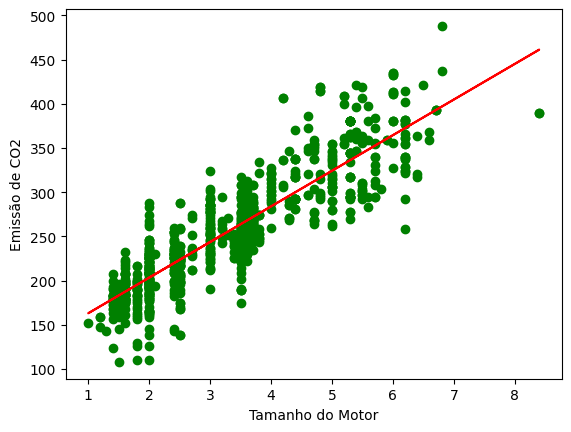

In [18]:
# Modelo de regressão linear simples, traçando a linha de ajuste (de tendência) dos dados
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='green')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Tamanho do Motor")
plt.ylabel("Emissão de CO2")

O gráfico a seguir é produzido utilizando a função `learning_curve` da biblioteca scikit-learn, para avaliar o desempenho do modelo de regressão acima. As métricas utilizadas são:

* **RMSE (Root Mean Squared Error)**: métrica de avaliação que mede a diferença entre os valores previstos e os valores reais.
* `train_scores`: Desempenho do modelo no conjunto de treinamento.
* `valid_scores`: Desempenho do modelo no conjunto de validação cruzada.

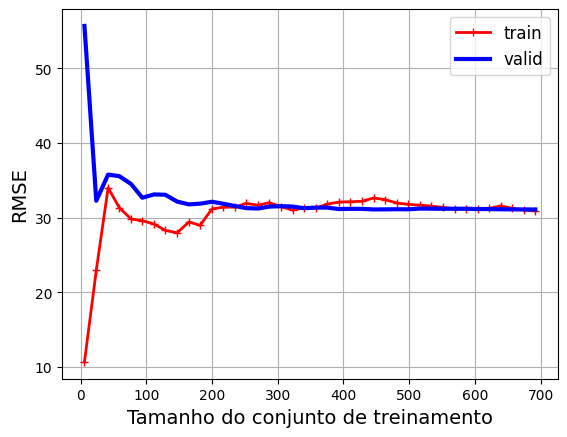

In [19]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
regr, train_x, train_y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.legend(loc="best", fontsize=12)
plt.grid(True)
plt.xlabel("Tamanho do conjunto de treinamento", fontsize=14)
plt.ylabel("RMSE", fontsize=14)

plt.show()

* A **curva vermelha** (`train`) representa o erro médio do modelo no conjunto de treinamento para diferentes tamanhos de conjuntos de dados. Inicialmente, o erro é baixo quando há poucos dados de treinamento, pois o modelo pode se ajustar perfeitamente (*overfitting*). Conforme o tamanho do conjunto de treinamento aumenta, o erro no treinamento também aumenta, pois o modelo não consegue ajustar perfeitamente dados mais variados e complexos.

* A **curva Azul** (`valid`) representa o erro médio do modelo no conjunto de validação. Inicialmente, o erro é alto porque o modelo treina com poucos dados e, portanto, generaliza mal para os dados de validação. Com o aumento do tamanho do conjunto de treinamento, o modelo melhora sua capacidade de generalização, e o erro de validação diminui até atingir um platô.

O modelo inicialmente sofre de *overfitting*, que diminui conforme o conjunto de treinamento aumenta. Quando as curvas se estabilizam e estão próximas, o modelo apresenta um bom equilíbrio entre viés e variância, indicando boa generalização.

Em conjuntos maiores, o modelo alcança um bom equilíbrio entre ajuste e generalização, indicado pela proximidade entre as curvas de treinamento e validação.

## **Modelo de Regressão Linear Múltipla com 2 variáveis idependentes**

---



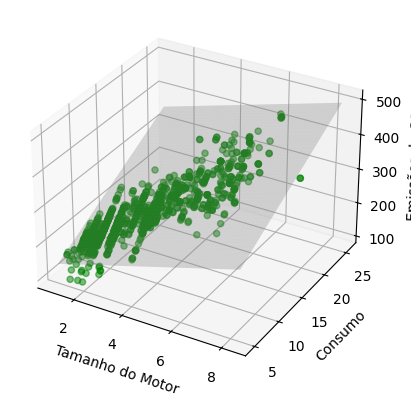

Coeficientes:  [[19.86043657  9.86089538]]
Intercepto:  [76.42067005]


In [20]:
from mpl_toolkits.mplot3d import Axes3D

# Definição das variáveis preditoras (X) e a variável alvo (y)
x1 = df['ENGINESIZE']
x2 = df['FUELCONSUMPTION_COMB']
X = df[['ENGINESIZE', 'FUELCONSUMPTION_COMB']]
Y = df['CO2EMISSIONS']

# np.asarray() converte os dados em arrays NumPy para tornar eficiente os cálculos e train, um DataFrame Pandas contem os dados originais usados para treinar o modelo
x = np.asanyarray(train[['ENGINESIZE','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr = linear_model.LinearRegression()
# Ajuste do modelo de regressão aos dados
regr.fit (x, y)

# Cria a malha para o gráfico de superfície
x1_surf, x2_surf = np.meshgrid(np.linspace(x1.min(), x1.max(), 100), np.linspace(x2.min(), x2.max(), 100))
X_surf = np.column_stack((x1_surf.ravel(), x2_surf.ravel()))
Y_pred_surf = regr.predict(X_surf).reshape(x1_surf.shape)

# Gera o gráfico de superfície 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, Y, c='green', marker='o', alpha=0.5)
ax.plot_surface(x1_surf, x2_surf, Y_pred_surf, color='grey', alpha=0.3)
ax.set_xlabel('Tamanho do Motor')
ax.set_ylabel('Consumo')
ax.set_zlabel('Emissões de CO2')
plt.show()

# Exibindo os coeficientes do modelo
print ('Coeficientes: ', regr.coef_)
print ('Intercepto: ',regr.intercept_)

## **Regressão Linear Múltipla com 3 variáveis independentes**

---



In [21]:
# Estimação dos coeficientes do modelo de regressão linear múltipla para previsão da emissão de CO2
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Definição das variáveis preditoras (X) e a variável alvo (y)
X_train = train[['ENGINESIZE', 'FUELCONSUMPTION_COMB', 'CYLINDERS']].values
y_train = train['CO2EMISSIONS'].values

# Ajuste do modelo de regressão aos dados
regr = LinearRegression()
regr.fit(X_train, y_train)

# Exibindo os coeficientes e o intercepto do modelo
print("Coeficientes: ", regr.coef_)
print("Intercepto: ", regr.intercept_)

# Fazendo previsões no conjunto de teste
X_test = test[['ENGINESIZE', 'FUELCONSUMPTION_COMB', 'CYLINDERS']].values
y_test = test['CO2EMISSIONS'].values
y_pred = regr.predict(X_test)

# Cálculo da soma residual dos quadrados e Variance Score (R²)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Soma residual dos quadrados (MSE): %.2f" % mse)
print("Variance score (R²): %.2f" % r2)


Coeficientes:  [11.45318166  9.74391701  7.30184373]
Intercepto:  63.641964804347424
Soma residual dos quadrados (MSE): 491.30
Variance score (R²): 0.85


## **Métodos de Estimação dos Coeficientes**

A biblioteca scikit-learn fornece a implementação direta do Método dos Mínimos Quadrados Ordinários (OLS), com o objeto `LinearRegression`. O método `.fit(X, y)` ajusta o modelo aos dados fornecidos, e o atributo `.coef_` exibe os coeficientes das variáveis preditoras, enquanto `.intercept_` retorna o intercepto do modelo.

O OLS escolhe os parâmetros de uma função linear de um conjunto de variáveis explicativas minimizando a soma dos quadrados das diferenças entre a variável dependente alvo e aquelas previstas pela função linear.

Em outras palavras, ele tenta minimizar a soma dos erros quadrados (SSE) ou o erro quadrático médio (MSE) entre a variável alvo (${y}$) e nossa saída prevista ($\hat{y}$) em todas as amostras no conjunto de dados.

Assim, o OLS busca encontrar os melhores parâmetros a partir dos seguintes métodos:

*   Resolvendo os parâmetros do modelo analiticamente, usando equações de forma fechada; ou
*   usando um algoritmo de otimização (Gradiente Descendente, Gradiente Descendente Estocástico, Método de Newton, etc.).

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Preparação das variáveis preditoras (X) e a variável alvo (y) para treino
X_train = train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']]
y_train = train['CO2EMISSIONS']

# Ajuste do modelo de regressão linear múltipla
regr = LinearRegression()
regr.fit(X_train, y_train)

# Exibindo os coeficientes e o intercepto do modelo
print("Coeficientes:", regr.coef_)
print("Intercepto:", regr.intercept_)

# Preparação dos dados de teste
X_test = test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']]
y_test = test['CO2EMISSIONS']

# Fazendo previsões
y_pred = regr.predict(X_test)

# Calculando as métricas
mse = mean_squared_error(y_test, y_pred)  # Erro médio quadrático
r2 = r2_score(y_test, y_pred)  # Coeficiente de determinação

# Exibindo resultados
print(f"Soma residual dos quadrados (MSE): {mse:.2f}")
print(f"Variance score (R²): {r2:.2f}")


Coeficientes: [11.7222264   6.67298461  6.72000164  2.56898267]
Intercepto: 65.55467384849686
Soma residual dos quadrados (MSE): 496.66
Variance score (R²): 0.85


Após ajustar o modelo e realizar as predições, o cálculo do Erro Quadrático Médio (MSE) e da variância explicada (R2-score) ajudam a avaliar a performance do modelo. O MSE mostra a magnitude média dos erros de previsão em termos quadráticos, enquanto a variância explicada indica quanta variabilidade o modelo conseguiu capturar em relação aos dados reais.

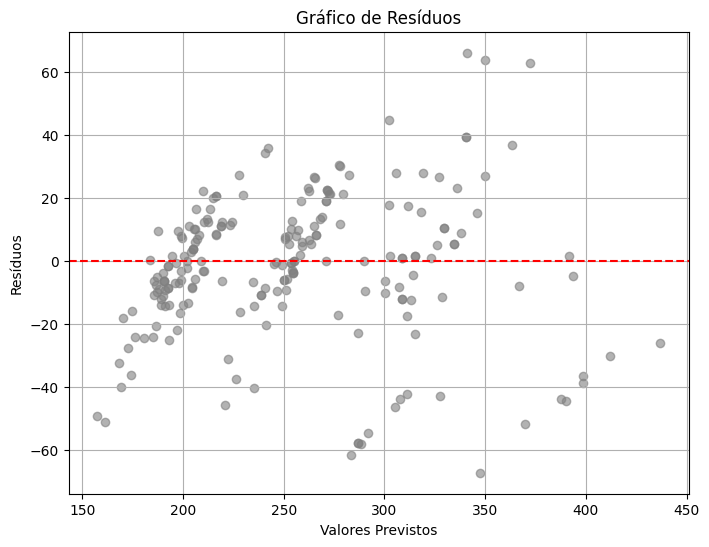

In [32]:
# Importar bibliotecas necessárias
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Dividindo os dados em treino e teste
X = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']]
y = df['CO2EMISSIONS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando e treinando o modelo de regressão linear
regr = LinearRegression()
regr.fit(X_train, y_train)

# Fazendo previsões
y_pred = regr.predict(X_test)

# Convertendo y_pred para um array 2D com uma coluna
y_pred_2d = y_pred.reshape(-1, 1)

# Calculando os resíduos
residuals = y_test - y_pred

# Criando o gráfico de resíduos
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='grey', alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos')
plt.grid(True)
plt.show()


## **Interpretação do Gráfico de Resíduos**

Os resíduos são as diferenças entre os valores reais e os valores previstos pelo modelo. O ideal é que os resíduos sejam distribuídos de forma aleatória ao redor da linha vermelha (y=0), sem padrões evidentes. Isso indicaria que o modelo não tem vieses significativos e que a relação entre as variáveis independentes e a variável dependente foi bem capturada pelo modelo.

Mas se houver um padrão claro nos resíduos, como um formato de curva, tendência ou agrupamento, isso pode sugerir:

1.   **Heterocedasticidade**: Quando a variabilidade dos resíduos muda ao longo dos valores previstos, indicando que o modelo pode não estar capturando adequadamente a variância dos dados.
2.   **Falha na linearidade**: Se os resíduos formarem um padrão curvilíneo, isso pode indicar que a relação entre as variáveis preditoras e a variável alvo não é completamente linear e que um modelo mais complexo (por exemplo, regressão polinomial) pode ser necessário.
3. **Outliers**: Resíduos muito altos (acima ou abaixo de 0) podem indicar a presença de *outliers*, isto é, "pontos fora da curva" que o modelo não conseguiu prever adequadamente.

No gráfico acima, há alguma dispersão dos resíduos em torno da linha vermelha, com alguns grupos de pontos se destacando, podendo indicar que o modelo não está capturando bem certos padrões nos dados ou que há heterocedasticidade presente, onde a variabilidade dos resíduos muda para diferentes intervalos de valores previstos. Além disso, há alguns resíduos com valores muito altos, o que pode ser um indicativo de outliers nos dados.

## **Implementação com NumPy**

In [34]:
from sklearn import linear_model

# Preparar as características (X) e a variável alvo (y) para o conjunto de treinamento
X_train = np.asanyarray(train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']])
y_train = np.asanyarray(train[['CO2EMISSIONS']])

# Criando e treinando o modelo de regressão linear
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)  # Treinar o modelo com os dados de treinamento
print('Coeficientes:', regr.coef_)

# Preparar as características (X) para o conjunto de teste
X_test = np.asanyarray(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']])

# Calculando as predições no conjunto de dados de teste
y_hat = regr.predict(X_test)  # Fazer previsões com o modelo treinado

# Preparar a variável alvo (y) para o conjunto de teste
y_test = np.asanyarray(test[['CO2EMISSIONS']])

# Validando o modelo
print("Erro Quadrático Médio (MSE): %.2f" % np.mean((y_hat - y_test) ** 2))
print('Variance Score: %.2f' % regr.score(X_test, y_test))

Coeficientes: [[11.7222264   6.67298461  6.72000164  2.56898267]]
Erro Quadrático Médio (MSE): 496.66
Variance Score: 0.85


## **Referências**

GÉRON, A. **Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems**. Canada: O’Reilly, 2023.